import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# create regression data set
x_np , y_np = datasets.make_regression(n_samples=20, n_features=1, noise=20, random_state=10)

# format data set for torch tensor
x = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape


In [17]:
# create model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [18]:
#training setting
learning_rate = 0.01
n_iters = 100

# loss function
loss = nn.MSELoss()

#gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 


In [19]:
# training loop
num_epochs = 10
for epoch in range(num_epochs):
    # predict = forward pass
    y_predicted = model(x)

    # loss
    l = loss(y_predicted, y)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()
    
    if (epoch+1) % 1 == 0:
        print(f'epoch: {epoch+1}, loss = {l.item():.2f}')


epoch: 1, loss = 1632.23
epoch: 2, loss = 1592.25
epoch: 3, loss = 1553.60
epoch: 4, loss = 1516.23
epoch: 5, loss = 1480.10
epoch: 6, loss = 1445.17
epoch: 7, loss = 1411.40
epoch: 8, loss = 1378.74
epoch: 9, loss = 1347.15
epoch: 10, loss = 1316.61


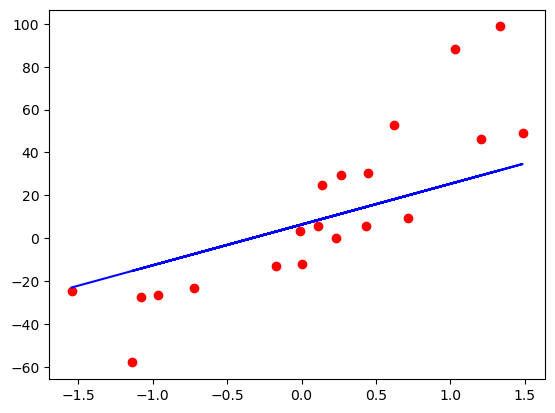

In [15]:
# Plot
# detach gradient as false

predicted = model(x).detach().numpy()

plt.plot(x_np, y_np, 'ro')
plt.plot(x_np, predicted, 'b')
plt.show()